In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import husl
from random import shuffle
from legendgram import legendgram
import mapclassify
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import ListedColormap

from tqdm import tqdm

/Users/martin/anaconda3/envs/geo_dev/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
clusters = pd.read_csv('/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/clustering/200309_clusters_complete_n30.csv', index_col=0)

In [3]:
gdf = gpd.read_file('/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/clustering/geometry.gpkg',
                   layer='buildings')

In [4]:
gdf = gdf.merge(clusters, on='uID', how='left')
gdf.shape

(252385, 6)

In [5]:
gdf = gdf.dropna()
print(len(gdf.cluster.unique()))
gdf.shape

30


(252310, 6)

In [6]:
def north_arrow(f, ax, rotation=0, loc=2, legend_size=(.1,.1), frameon=False, thick=.1, outline=3, edgecolor='k', facecolor='k'):
    from legendgram.util import make_location
    from matplotlib.transforms import Affine2D
    
    arrpos = make_location(ax, loc, legend_size=legend_size)
    arrax = f.add_axes(arrpos)

    circle = plt.Circle((0, 0), radius=1, edgecolor=edgecolor, facecolor='w', linewidth=outline)
    arrax.add_patch(circle)

    rectangle = plt.Rectangle((-0.05, 0), thick, 1, facecolor=facecolor)
    t = Affine2D().rotate_deg(rotation) + arrax.transData
    rectangle.set_transform(t)
    arrax.add_patch(rectangle)
    arrax.axis('scaled')
    arrax.set_frame_on(frameon)
    arrax.get_yaxis().set_visible(False)
    arrax.get_xaxis().set_visible(False)
    return arrax

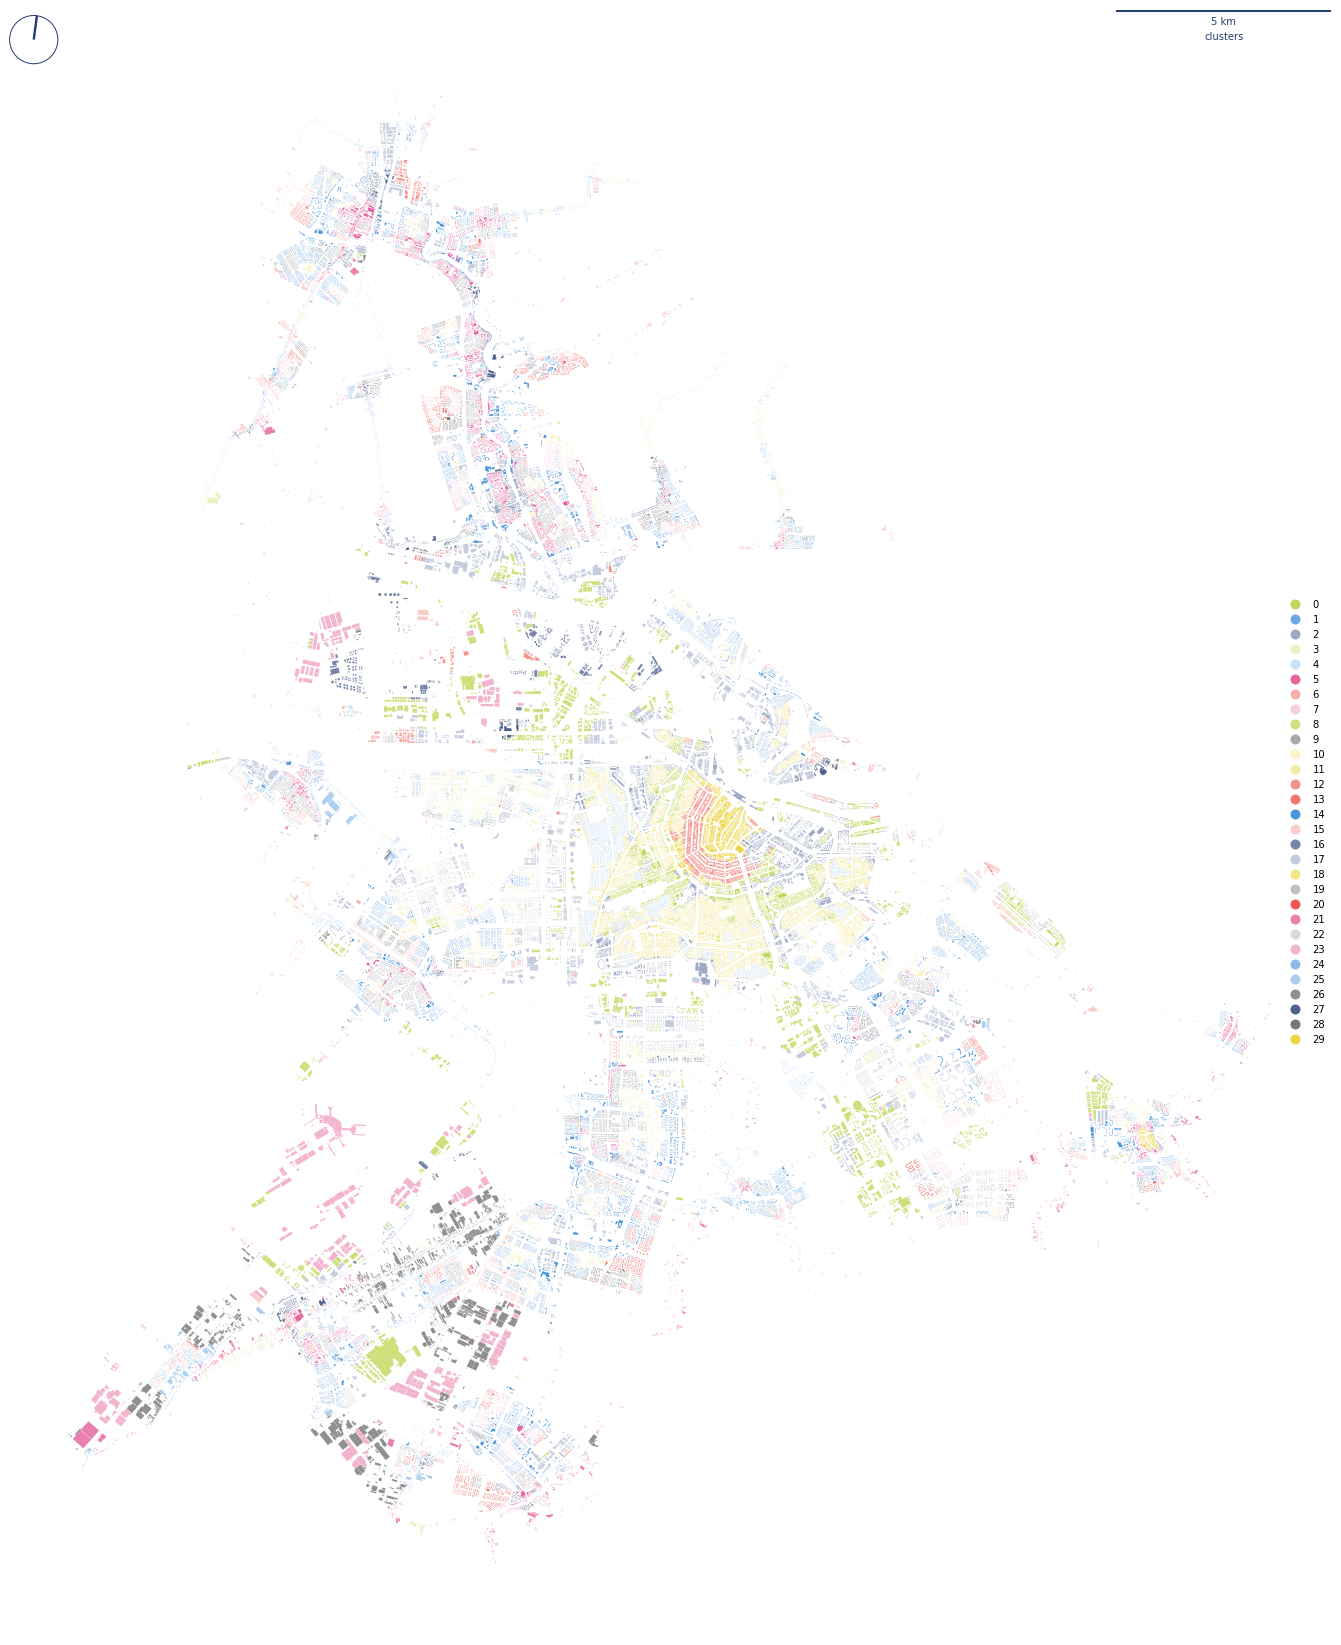

In [7]:
# settings
values = gdf['cluster']
gdf = gdf
label = 'clusters'
colors = [(257, 71, 27), (98, 93, 78), (14, 79, 58), (26, 0, 50), (75, 90, 85), (347, 72, 60), (246, 79, 60)]
color = (257, 71, 27)  # here for arrow, title, scalebar


# plotting
c = husl.husl_to_hex(*color)

cols = []
for col in colors:
    pal = sns.light_palette(col, input="husl", n_colors=6)
    for rgb in pal[1:]:
        cols.append(rgb)
shuffle(cols)  # shuffle to break grouping
cmap = ListedColormap(cols)

ax = gdf.plot(values, cmap=cmap, figsize=(30, 30), categorical=True, legend=True, legend_kwds={'loc': 'center right', 'frameon': False})
ax.set_axis_off()


# add scalebar
scalebar = ScaleBar(dx=1,
                    color=c,
                    location=1,
                    height_fraction=0.001,
                    #fixed_value=1000,
                    label=label,
                    label_loc='bottom'
                    )
ax.add_artist(scalebar)

# add arrow
north_arrow(plt.gcf(), ax, -7.5, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)

In [7]:
cols = []
colors = [(257, 71, 27), (98, 93, 78), (14, 79, 58), (26, 0, 50), (75, 90, 85), (347, 72, 60), (246, 79, 60)]

for col in colors:
    pal = sns.light_palette(col, input="husl", n_colors=6)
    for rgb in pal[1:]:
        cols.append(rgb)

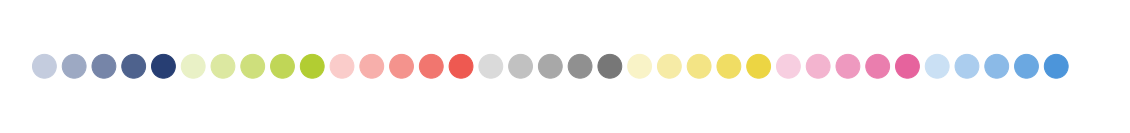

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))
for i, c in enumerate(cols):
    ax.add_artist(plt.Circle((i, 0), 0.4, color=c))    
    ax.set_axis_off()
    ax.set_aspect(1)
    plt.xlim(-1.25,36.25)
    plt.ylim(-2,2)

In [13]:
colors = [(257, 71, 27), (98, 93, 78), (14, 79, 58), (26, 0, 50), (75, 90, 85), (347, 72, 60), (246, 79, 60)]
[husl.husl_to_hex(*color) ]

['#273e72', '#b2cd32', '#ee5951', '#777777', '#ecd544', '#e6639d', '#4c95da']

In [9]:
symbology = {0: cols[0],
             1: cols[5],
             2: cols[9],
             3: cols[2],
             4: cols[11],
             5: cols[7],
             6: cols[13],
             7: cols[18],
             8: cols[25],
             9: cols[15],
             10: cols[33],
             11: cols[4],
             12: cols[26],
             13: cols[24],
             14: cols[34],
             15: cols[20],
             16: cols[29],
             17: cols[23],
             18: cols[19],
             19: cols[32],
             20: cols[22],
             21: cols[17],
             22: cols[14],
             23: cols[8],
             24: cols[12],
             25: cols[3],
             26: cols[10],
             27: cols[6],
             28: cols[1],
             29: cols[14]
            }

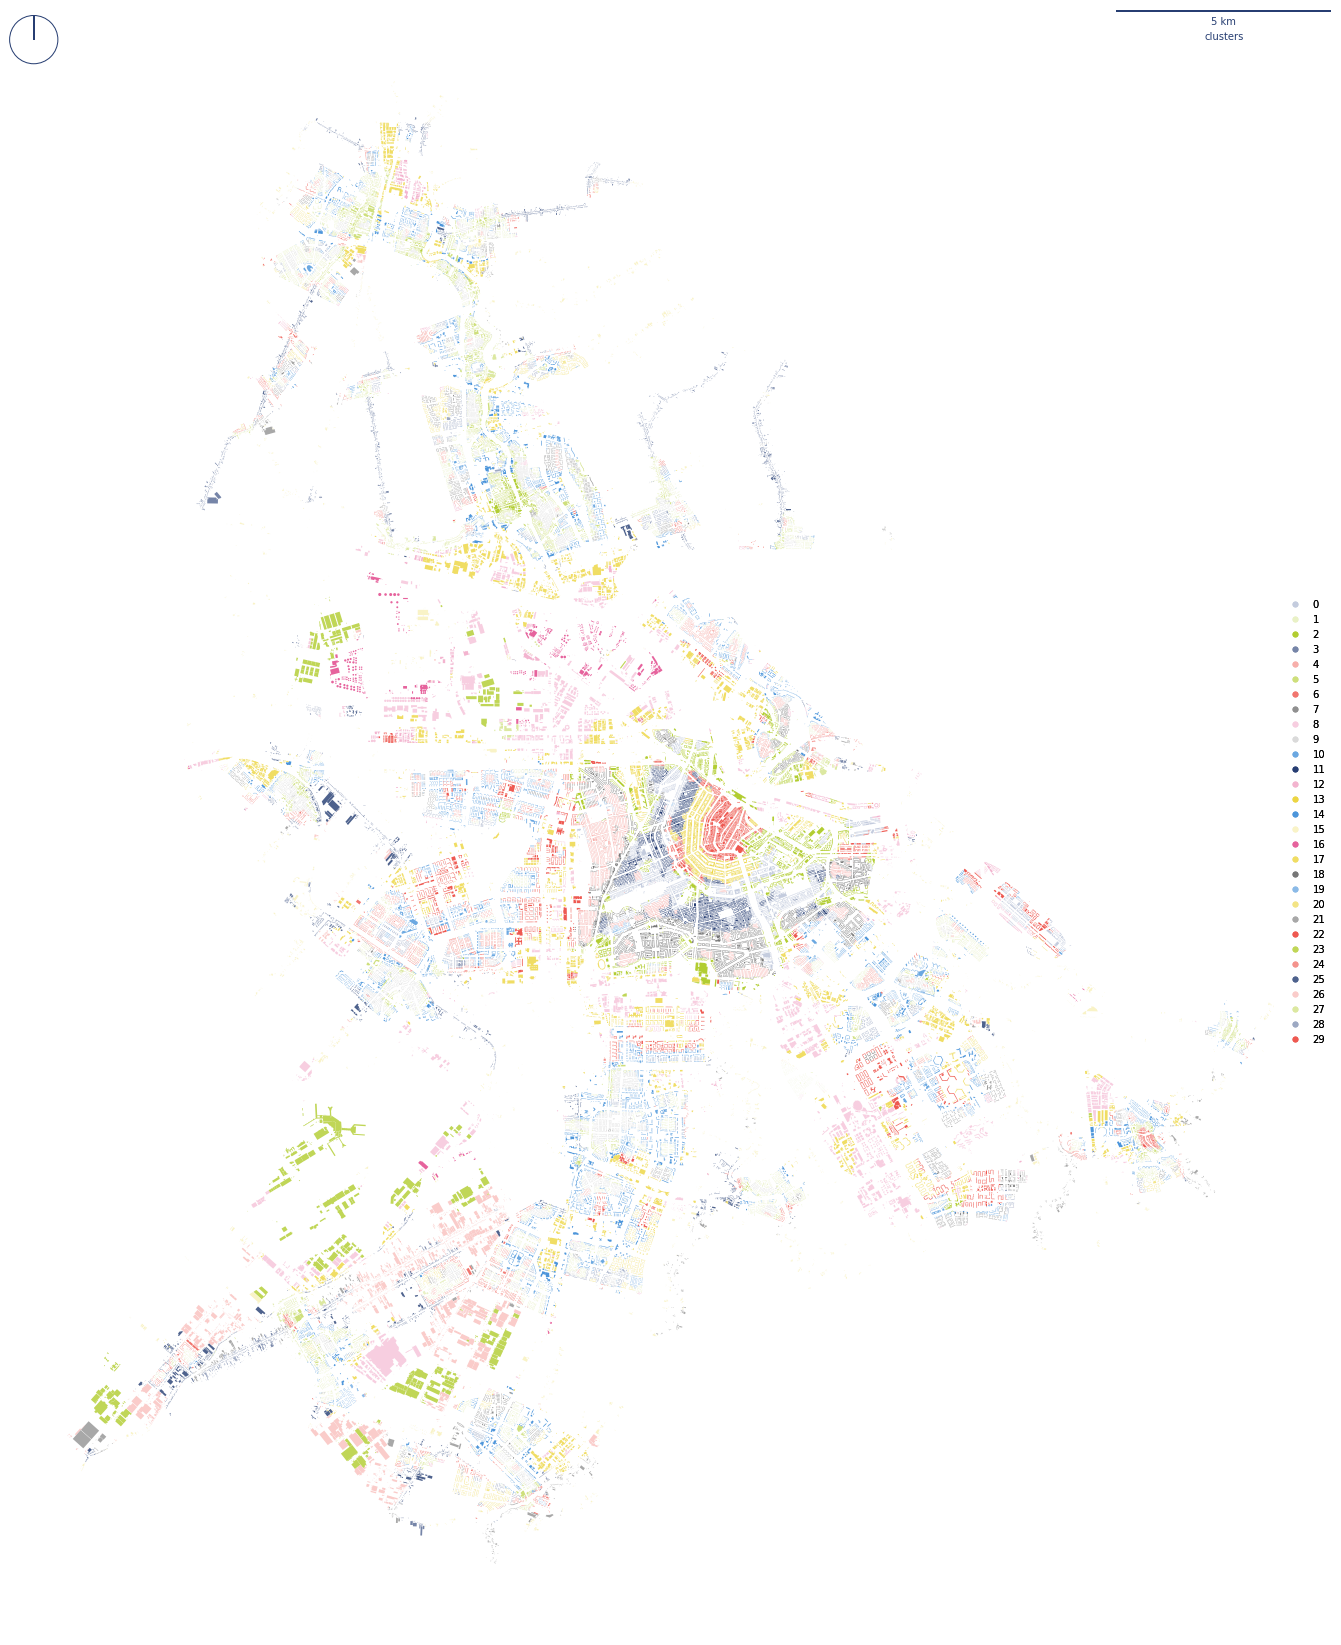

In [11]:
# settings
gdf = gdf
label = 'clusters'
color = (257, 71, 27)  # here for arrow, title, scalebar


# plotting
c = husl.husl_to_hex(*color)

ax = gdf.plot(color=gdf['cluster'].map(symbology), figsize=(30, 30))
ax.set_axis_off()


# add scalebar
scalebar = ScaleBar(dx=1,
                    color=c,
                    location=1,
                    height_fraction=0.001,
                    #fixed_value=1000,
                    label=label,
                    label_loc='bottom'
                    )
ax.add_artist(scalebar)

# add arrow
north_arrow(plt.gcf(), ax, 0, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)

# add manual legend
from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
leg_points = ax.legend(custom_points, symbology.keys(), loc='center right', frameon=False)
ax.add_artist(leg_points)
for ext in ['pdf', 'png']:
    plt.savefig('figures/clusters/AMS_clusters.' + ext, bbox_inches='tight')

In [12]:
# RUN THIS ONCE MORE WITH FIXED ARROW

# settings
gdf = gdf
color = (257, 71, 27)  # here for arrow, title, scalebar


# plotting
c = husl.husl_to_hex(*color)

for i in tqdm(range(30), total=30):
    label = 'cluster ' + str(i) 


    df = gdf[gdf.cluster == i]

    ax = df.plot(color=df['cluster'].map(symbology), figsize=(30, 30), zorder=1)
    gdf.plot(ax=ax, color='whitesmoke', zorder=0)
    ax.set_axis_off()


    # add scalebar
    scalebar = ScaleBar(dx=1,
                        color=c,
                        location=1,
                        height_fraction=0.001,
                        #fixed_value=1000,
                        label=label,
                        label_loc='bottom'
                        )
    ax.add_artist(scalebar)

    # add arrow
    north_arrow(plt.gcf(), ax, 0, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)

    for ext in ['pdf', 'png']:
        plt.savefig('figures/clusters/AMS_cluster_' + str(i) + '.' + ext, bbox_inches='tight')
    plt.close()

100%|██████████| 30/30 [1:23:16<00:00, 166.54s/it]


In [32]:
counts = clusters.cluster.value_counts()

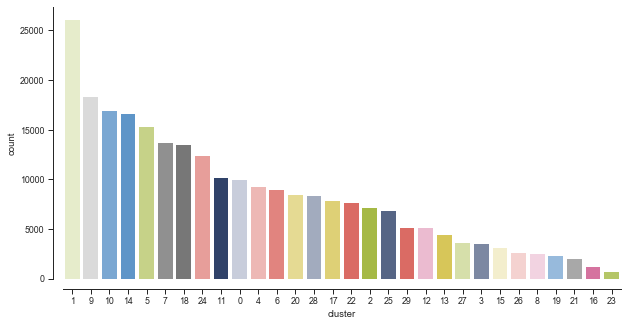

In [41]:
sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(ax=ax, x=counts.index, y=counts, order=counts.index, palette=symbology)
sns.despine(offset=10)
plt.ylabel('count')
plt.xlabel('cluster')
for ext in ['pdf', 'png']:
        plt.savefig('figures/clusters/AMS_cluster_count.' + ext, bbox_inches='tight')

In [9]:
gdf.total_bounds

array([106241.642, 470142.891, 134316.805, 504641.878])

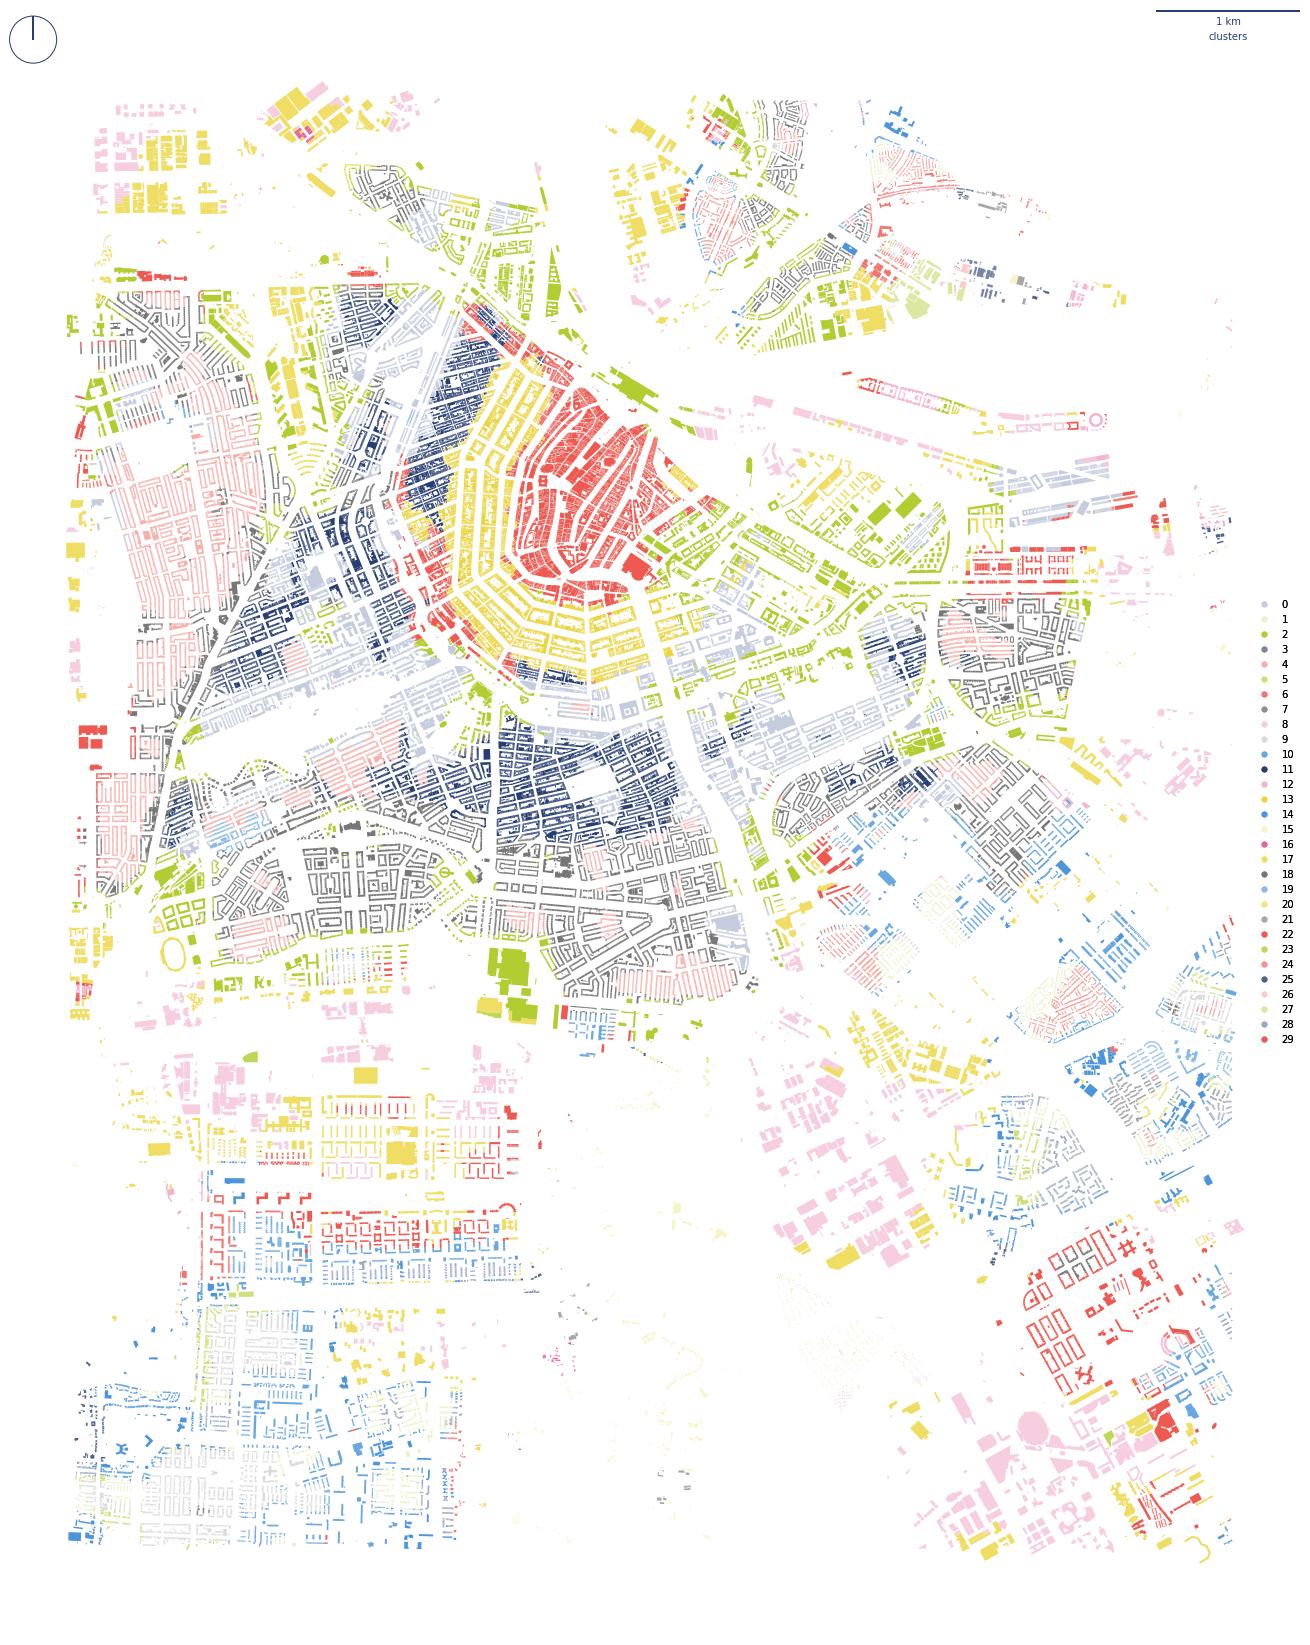

In [10]:
# settings
gdf_pl = gdf.cx[118000:126000, 480000:490000]
label = 'clusters'
color = (257, 71, 27)  # here for arrow, title, scalebar


# plotting
c = husl.husl_to_hex(*color)

ax = gdf_pl.plot(color=gdf_pl['cluster'].map(symbology), figsize=(30, 30))
ax.set_axis_off()


# add scalebar
scalebar = ScaleBar(dx=1,
                    color=c,
                    location=1,
                    height_fraction=0.001,
                    #fixed_value=1000,
                    label=label,
                    label_loc='bottom'
                    )
ax.add_artist(scalebar)

# add arrow
north_arrow(plt.gcf(), ax, 0, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)

# add manual legend
from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
leg_points = ax.legend(custom_points, symbology.keys(), loc='center right', frameon=False)
ax.add_artist(leg_points)
for ext in ['pdf', 'png']:
    plt.savefig('figures/clusters/AMS_clusters_detail.' + ext, bbox_inches='tight')